In [6]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [7]:
df = pd.read_csv('Dataset.csv')

C:\Users\Sanika Acharekar\AppData\Local\Temp\ipykernel_3176\1385207280.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Dataset.csv')


In [8]:
df.head()

,Unnamed: 0,name,headline,location,followers,connections,about,time_spent,content,content_links,media_type,media_url,num_hashtags,hashtag_followers,hashtags,reactions,comments,views,votes
0,0,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,1 day ago,Robert Lerman writes that achieving a healthy...,[['https://www.linkedin.com/in/ACoAAACy1HkBviR...,article,['https://www.urban.org/urban-wire/its-time-mo...,4,0,"[['#workbasedlearning', 'https://www.linkedin....",12,1,NaN,NaN
1,1,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,1 week ago,"National disability advocate Sara Hart Weir, ...",[['https://www.linkedin.com/in/ACoAAAHsfJgBb7_...,NaN,[],0,0,[],11,0,NaN,NaN
2,2,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,2 months ago,NaN,[],NaN,[],0,0,[],15,0,NaN,NaN
3,3,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,2 months ago,Exploring in this months Talent Management & H...,[['https://www.linkedin.com/in/ACoAAAADlGIBLfn...,article,['https://www.tlnt.com/apprenticeships-that-br...,4,0,"[['#careerplanning', 'https://www.linkedin.com...",44,0,NaN,NaN
4,4,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,2 months ago,I count myself fortunate to have spent time wi...,[['https://www.linkedin.com/in/ACoAABhNxDUB9IX...,article,['https://gritdaily.com/the-legacy-of-verified...,3,0,"[['#verifiedresumes', 'https://www.linkedin.co...",22,2,NaN,NaN


In [9]:
df

,Unnamed: 0,name,headline,location,followers,connections,about,time_spent,content,content_links,media_type,media_url,num_hashtags,hashtag_followers,hashtags,reactions,comments,views,votes
0,0,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,1 day ago,Robert Lerman writes that achieving a healthy...,[['https://www.linkedin.com/in/ACoAAACy1HkBviR...,article,['https://www.urban.org/urban-wire/its-time-mo...,4,0,"[['#workbasedlearning', 'https://www.linkedin....",12,1,NaN,NaN
1,1,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,1 week ago,"National disability advocate Sara Hart Weir, ...",[['https://www.linkedin.com/in/ACoAAAHsfJgBb7_...,NaN,[],0,0,[],11,0,NaN,NaN
2,2,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,2 months ago,NaN,[],NaN,[],0,0,[],15,0,NaN,NaN
3,3,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,2 months ago,Exploring in this months Talent Management & H...,[['https://www.linkedin.com/in/ACoAAAADlGIBLfn...,article,['https://www.tlnt.com/apprenticeships-that-br...,4,0,"[['#careerplanning', 'https://www.linkedin.com...",44,0,NaN,NaN
4,4,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,2 months ago,I count myself fortunate to have spent time wi...,[['https://www.linkedin.com/in/ACoAABhNxDUB9IX...,article,['https://gritdaily.com/the-legacy-of-verified...,3,0,"[['#verifiedresumes', 'https://www.linkedin.co...",22,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34007,34007,Simon Sinek,Optimist and Author at Simon Sinek Inc.,NaN,4206024.0,NaN,Simon Sinek is an unshakable optimist who beli...,4 years ago,Igniter of the Year 2016. Well I know that I'm...,[],image,['https://media-exp1.licdn.com/dms/image/C5622...,0,0,[],4005,93,NaN,NaN
34008,34008,Simon Sinek,Optimist and Author at Simon Sinek Inc.,NaN,4206024.0,NaN,Simon Sinek is an unshakable optimist who beli...,4 years ago,Executives who prioritize the shareholder are ...,[],video,[],0,0,[],1698,74,NaN,NaN
34009,34009,Simon Sinek,Optimist and Author at Simon Sinek Inc.,NaN,4206024.0,NaN,Simon Sinek is an unshakable optimist who beli...,4 years ago,"Like many, I too have been reflecting as we ne...",[],video,[],0,0,[],661,59,NaN,NaN
34010,34010,Simon Sinek,Optimist and Author at Simon Sinek Inc.,NaN,4206024.0,NaN,Simon Sinek is an unshakable optimist who beli...,4 years ago,"If you say ""customer first"" that means your em...",[],video,[],0,0,[],766,35,NaN,NaN


In [10]:
df.shape[0]

34012

In [11]:
#Converting columns into list
columns = list(df)
columns

['Unnamed: 0',
 'name',
 'headline',
 'location',
 'followers',
 'connections',
 'about',
 'time_spent',
 'content',
 'content_links',
 'media_type',
 'media_url',
 'num_hashtags',
 'hashtag_followers',
 'hashtags',
 'reactions',
 'comments',
 'views',
 'votes']

In [12]:
#Drop columns because these columns had values that were not relevant
df_new = df.drop(['Unnamed: 0', 'hashtag_followers', 'views', 'votes'], axis = 1)

In [13]:
df_new.head()

,name,headline,location,followers,connections,about,time_spent,content,content_links,media_type,media_url,num_hashtags,hashtags,reactions,comments
0,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,1 day ago,Robert Lerman writes that achieving a healthy...,[['https://www.linkedin.com/in/ACoAAACy1HkBviR...,article,['https://www.urban.org/urban-wire/its-time-mo...,4,"[['#workbasedlearning', 'https://www.linkedin....",12,1
1,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,1 week ago,"National disability advocate Sara Hart Weir, ...",[['https://www.linkedin.com/in/ACoAAAHsfJgBb7_...,NaN,[],0,[],11,0
2,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,2 months ago,NaN,[],NaN,[],0,[],15,0
3,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,2 months ago,Exploring in this months Talent Management & H...,[['https://www.linkedin.com/in/ACoAAAADlGIBLfn...,article,['https://www.tlnt.com/apprenticeships-that-br...,4,"[['#careerplanning', 'https://www.linkedin.com...",44,0
4,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,2 months ago,I count myself fortunate to have spent time wi...,[['https://www.linkedin.com/in/ACoAABhNxDUB9IX...,article,['https://gritdaily.com/the-legacy-of-verified...,3,"[['#verifiedresumes', 'https://www.linkedin.co...",22,2


In [14]:
#checking null value count
df_new.isna().sum()

name                0
headline            0
location         2272
followers          42
connections      8299
about               0
time_spent          1
content          2016
content_links       0
media_type       7233
media_url           0
num_hashtags        0
hashtags            0
reactions           0
comments            0
dtype: int64

In [15]:
#Replacing null values
df_new['Location'] = df_new['location'].fillna('Unknown')
df_new.drop(['location'], axis=1, inplace= True)

In [16]:
df_new['Connections'] = df_new['connections'].fillna(0)
df_new.drop(['connections'], axis=1, inplace= True)

In [17]:
df_new.head()

,name,headline,followers,about,time_spent,content,content_links,media_type,media_url,num_hashtags,hashtags,reactions,comments,Location,Connections
0,Nicholas Wyman,CEO IWSI Group,6484.0,Nicholas Wyman for the past 25 years has shone...,1 day ago,Robert Lerman writes that achieving a healthy...,[['https://www.linkedin.com/in/ACoAAACy1HkBviR...,article,['https://www.urban.org/urban-wire/its-time-mo...,4,"[['#workbasedlearning', 'https://www.linkedin....",12,1,Unknown,500+
1,Nicholas Wyman,CEO IWSI Group,6484.0,Nicholas Wyman for the past 25 years has shone...,1 week ago,"National disability advocate Sara Hart Weir, ...",[['https://www.linkedin.com/in/ACoAAAHsfJgBb7_...,NaN,[],0,[],11,0,Unknown,500+
2,Nicholas Wyman,CEO IWSI Group,6484.0,Nicholas Wyman for the past 25 years has shone...,2 months ago,NaN,[],NaN,[],0,[],15,0,Unknown,500+
3,Nicholas Wyman,CEO IWSI Group,6484.0,Nicholas Wyman for the past 25 years has shone...,2 months ago,Exploring in this months Talent Management & H...,[['https://www.linkedin.com/in/ACoAAAADlGIBLfn...,article,['https://www.tlnt.com/apprenticeships-that-br...,4,"[['#careerplanning', 'https://www.linkedin.com...",44,0,Unknown,500+
4,Nicholas Wyman,CEO IWSI Group,6484.0,Nicholas Wyman for the past 25 years has shone...,2 months ago,I count myself fortunate to have spent time wi...,[['https://www.linkedin.com/in/ACoAABhNxDUB9IX...,article,['https://gritdaily.com/the-legacy-of-verified...,3,"[['#verifiedresumes', 'https://www.linkedin.co...",22,2,Unknown,500+


In [18]:
Followers_mean = df_new.followers.mean()
Followers_mean

1125922.2806005299

In [19]:
df_new['Followers'] = df_new['followers'].fillna(Followers_mean)
df_new.drop(['followers'], axis = 1, inplace = True)

In [20]:
df_new.loc[df_new['time_spent'].isna()]

,name,headline,about,time_spent,content,content_links,media_type,media_url,num_hashtags,hashtags,reactions,comments,Location,Connections,Followers
14049,Gary Frisch,30-Year Public Relations Pro and Skilled Writer,I began my public relations careers when the S...,NaN,"Amid Coronavirus, PR pros should tread careful...",[],article,['https://www.linkedin.com/pulse/public-relati...,0,[],8,2,"['Greater', 'Philadelphia']",500+,30971.0


In [21]:
#So instead of putting in current date we decided to remove this record otherwise it would act as an outlier
df_new['Time_spent'] = df_new['time_spent'].fillna('Current Date')
df_new.drop(['time_spent'], axis = 1, inplace = True)

In [22]:
#We drop the rows where content is null because content is an important characteristic and the rows would not mean anything
df_new = df_new.loc[df_new['content'].notnull()]

In [23]:
df_new['Media_type'] = df_new['media_type'].fillna('None')
df_new.drop(['media_type'], axis = 1, inplace = True)

In [24]:
df_new.isna().sum()

name             0
headline         0
about            0
content          0
content_links    0
media_url        0
num_hashtags     0
hashtags         0
reactions        0
comments         0
Location         0
Connections      0
Followers        0
Time_spent       0
Media_type       0
dtype: int64

In [25]:
print('we dropped {} rows from original data set'.format(df.shape[0]-df_new.shape[0]))
df_new.shape[0]

we dropped 2016 rows from original data set


31996

In [26]:
#resetting index
df_new.reset_index(inplace = True, drop = True)

In [27]:
df_new.to_csv('LinkedIn Posts-Cleaned.csv', index=False)

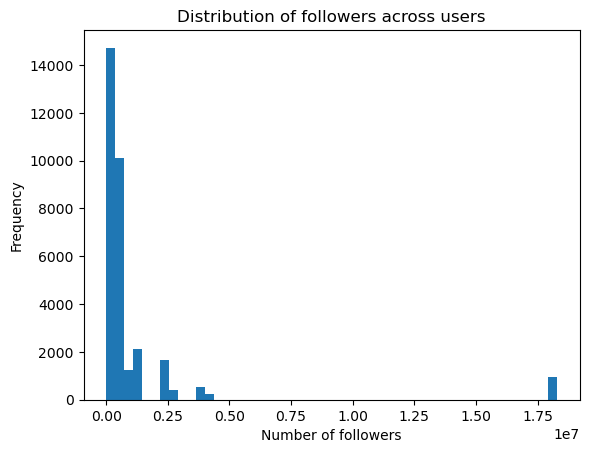

TypeError: 'value' must be an instance of str or bytes, not a int

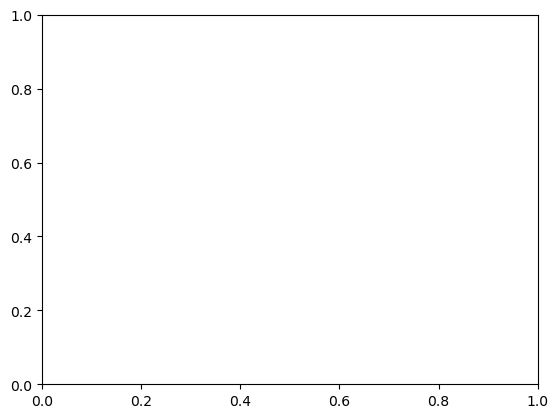

In [28]:
# Visualize the distribution of followers using a histogram
plt.hist(df_new['Followers'], bins=50)
plt.xlabel('Number of followers')
plt.ylabel('Frequency')
plt.title('Distribution of followers across users')
plt.show()

# Visualize the distribution of connections using a histogram
plt.hist(df_new['Connections'], bins=50)
plt.xlabel('Number of connections')
plt.ylabel('Frequency')
plt.title('Distribution of connections across users')
plt.show()

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_new[['Followers']], df_new['reactions'], test_size=0.1, random_state=35)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.11360028723716054


In [30]:
# Load the data
# Extract the features and target

X = df_new["Media_type"] # media_type, day_of_week, hour, followers_count
y = df_new["reactions"]    # reactions_count

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the reactions for the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

ValueError: could not convert string to float: 'None'

In [31]:
print(df_new["Media_type"])

0        article
1           None
2        article
3        article
4        article
          ...   
31991      image
31992      video
31993      video
31994      video
31995       None
Name: Media_type, Length: 31996, dtype: object
